<a href="https://colab.research.google.com/github/Binaryninja45/Telco_Churn_EDA/blob/main/Telco_Churn_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from io import IncrementalNewlineDecoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.shape

(7043, 21)

In [6]:
data = data.drop(['customerID'], axis=1)
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [7]:
data[data["TotalCharges"]==""]
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Observation:
* Before this 'TotalCharges' column might have had non-numeric values that weren't recognized as null or missing values. For example, a space, a text string, or some special characters.
* After we can see that there are 11 null values in 'TotalCharges' col

In [9]:
#Replacing the missing values with mean
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

In [10]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [11]:
data[data["tenure"]==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,2283.300441,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,2283.300441,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,2283.300441,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,2283.300441,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,2283.300441,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,2283.300441,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,2283.300441,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,2283.300441,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,2283.300441,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,2283.300441,No


In [12]:
#removing the row where tenure = 0
data.drop(labels=data[data['tenure']==0].index, axis=0, inplace=True)

# EDA

In [13]:
data['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<Axes: ylabel='Churn'>

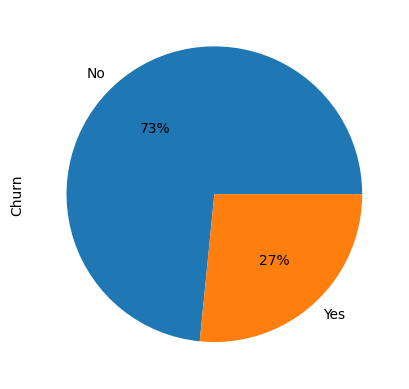

In [14]:
data['Churn'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [15]:
#Relation Betwwen Churn and gender
x=pd.crosstab(data['gender'], data['Churn'])
x

Churn,No,Yes
gender,,
Female,2544,939
Male,2619,930


<Axes: xlabel='gender'>

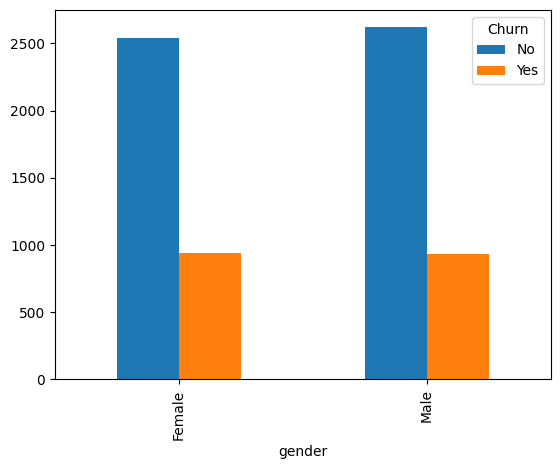

In [16]:
x.plot(kind="bar")

## Observation:
When compared uising pd.cross tab func, we can analyzing how different categories like gender relate to each other.

In [17]:
#Rel between contact and churn
y=pd.crosstab(data['Churn'], data['Contract'], normalize="index")
y

Contract,Month-to-month,One year,Two year
Churn,,,
No,0.429983,0.252954,0.317064
Yes,0.885500,0.088818,0.025682


<Axes: xlabel='Churn'>

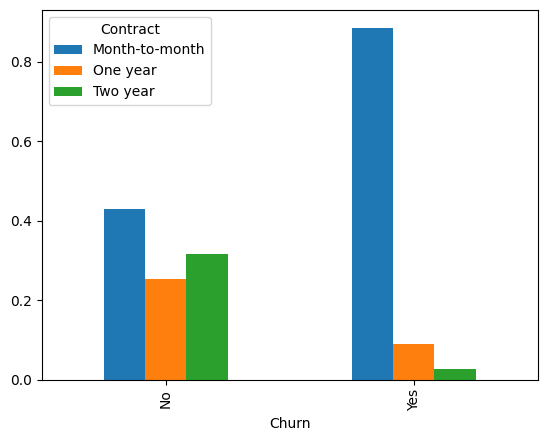

In [18]:
y.plot(kind="bar")

## Observation:
From the graph we can see that customers with month to month contract are more likely to churn.

In [19]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

<Axes: >

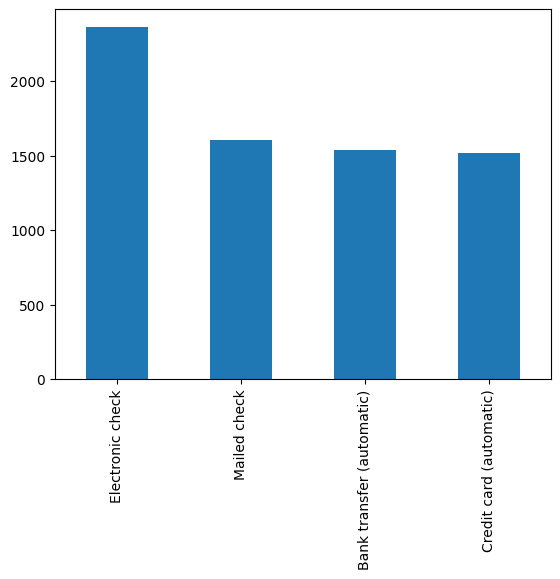

In [20]:
data['PaymentMethod'].value_counts().plot(kind="bar")

From the bar graph we can see that there is more no of electronic check than any other method.

In [21]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [22]:
pd.crosstab(data[data["gender"]=="Male"]["InternetService"],data[data["gender"]=="Male"]["Churn"])

Churn,No,Yes
InternetService,,
DSL,992,240
Fiber optic,910,633
No,717,57


In [23]:
pd.crosstab(data[data["gender"]=="Female"]["InternetService"], data[data["gender"]=="Female"]["Churn"])

Churn,No,Yes
InternetService,,
DSL,965,219
Fiber optic,889,664
No,690,56


<Axes: xlabel='Dependents'>

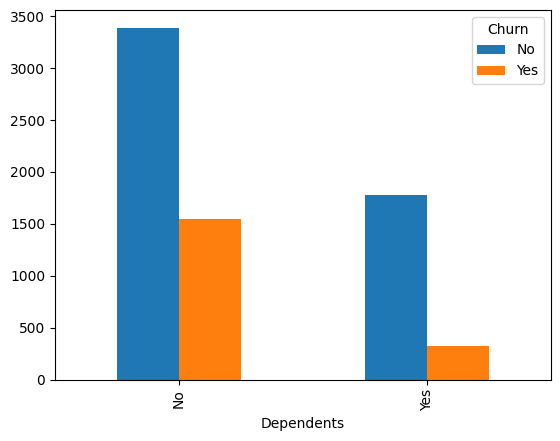

In [24]:
#Relation between Dependents and Churn
pd.crosstab(data["Dependents"], data["Churn"]).plot(kind="bar")

## Observation:
From the bar graph we can see that customers without dependents are more likely to churn

<Axes: xlabel='PaperlessBilling'>

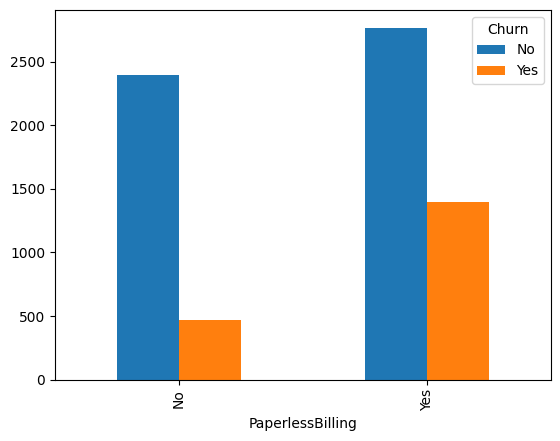

In [25]:
pd.crosstab(data['PaperlessBilling'], data['Churn']).plot(kind="bar")

## Observation:
From the graph we can see that customer with paperless billing are more likely to churn

<Axes: xlabel='TechSupport'>

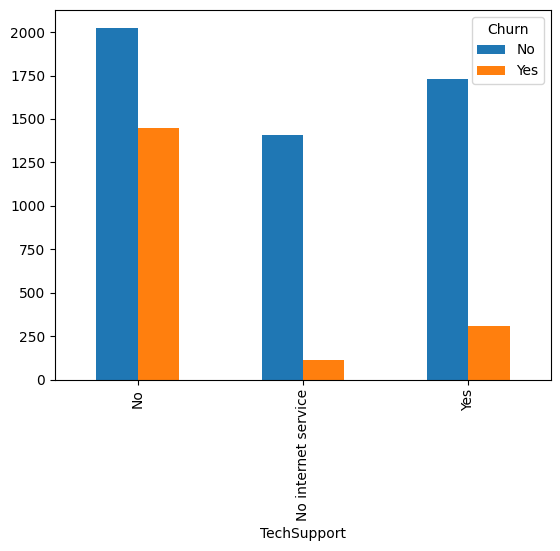

In [26]:
#Relation between Techsupport and Churn
pd.crosstab(data['TechSupport'], data['Churn']).plot(kind="bar")

## Observation:
From the graph we can see that customer with __NO__ tech support are more likely to migrate to other servies

In [27]:
#Relation between Tenure and churn
pd.crosstab(data['tenure'], data['Churn'], normalize="columns")

Churn,No,Yes
tenure,,
1,0.045129,0.203317
2,0.022274,0.065811
3,0.020531,0.050294
4,0.018013,0.044409
5,0.013364,0.034243
...,...,...
68,0.017625,0.004815
69,0.016851,0.004280
70,0.020918,0.005886


## Observation:
From the numbers we can say that new customer are more likely to churn

In [28]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Feature Engineering

### Label Encoding

In [29]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [31]:
data['gender'] = data['gender'].map({"Female":0, "Male":1})

In [32]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [33]:
data['Partner'] = data['Partner'].map({"Yes":1, "No":0})

In [34]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,0,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [35]:
data['Dependents'] = data['Dependents'].map({"Yes":1, "No":0})

In [36]:
data['PhoneService'] = data['PhoneService'].map({"Yes":1, "No":0})

In [37]:
data['PaperlessBilling'] = data['PaperlessBilling'].map({"Yes":1, "No":0})

In [38]:
data['Churn'] = data['Churn'].map({"Yes":1, "No":0})

In [39]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [40]:
# Creating Dummies
data = pd.get_dummies(data, drop_first=True)

In [41]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


# Model Development

In [42]:
X = data.drop(columns = 'Churn')
y = data['Churn'] #Seperating the dependent and independent values

In [43]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [44]:
#Spliting the data into train and test dateset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Logistic Regression

In [45]:
lg = LogisticRegression(max_iter=1000)
lg.fit(X_train, y_train) #Training the model

LogisticRegression(max_iter=1000)

In [46]:
lg.score(X_train, y_train)

0.8057737210783273

* 0.80 This is the __train accuracy__

In [47]:
lg.score(X_test, y_test)

0.7975010771219302

* 0.79 This is the __test accuracy__

In [48]:
pred_test = lg.predict(X_test) #prediction on test data

In [49]:
#Classification Report
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1711
           1       0.64      0.53      0.58       610

    accuracy                           0.80      2321
   macro avg       0.74      0.71      0.72      2321
weighted avg       0.79      0.80      0.79      2321



In [50]:
prob_test_1 = lg.predict_proba(X_test)[:,1]

In [51]:
# Model Evaluation
def classification_eva(act, pred, probs):
  ac1 = metrics.accuracy_score(act, pred)
  rc1 = metrics.recall_score(act, pred)
  pc1 = metrics.precision_score(act, pred)
  f1 = metrics.f1_score(act, pred)
  auc1 = metrics.roc_auc_score(act, pred)
  result = {"Accuracy":ac1, "Recall":rc1, "Precision":pc1, "F1 score":f1, "AUC":auc1}
  fpr, tpr, threshold = metrics.roc_curve(act, probs)
  plt.plot([0,1], [0,1], 'k--', label="AUC" + str(auc1))
  plt.plot(fpr, tpr)
  plt.xlabel('fpr')
  plt.ylabel('tpr')
  plt.legend()
  plt.show()
  return result

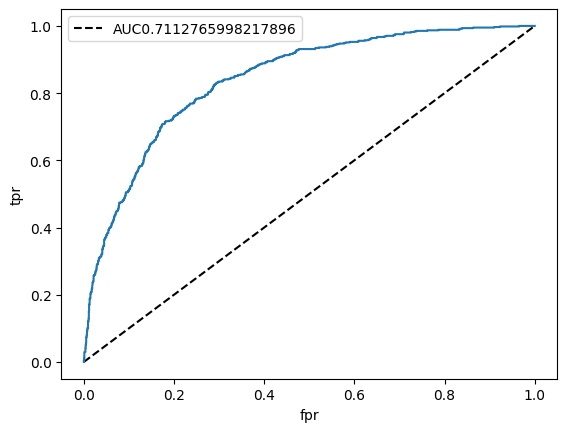

{'Accuracy': 0.7975010771219302,
 'Recall': 0.5295081967213114,
 'Precision': 0.6383399209486166,
 'F1 score': 0.578853046594982,
 'AUC': 0.7112765998217896}

In [52]:
classification_eva(y_test, pred_test, prob_test_1)

# Random Forest

In [53]:
# using RandomizedsearchCV for hyperparameter tuning
params_rf={"criterion":["gini","entropy"],
          "max_depth":[9,11,13,15,17,20],
          "min_samples_split":[20,50,100,200],
          "min_samples_leaf":[2,5,20,10],
          "n_estimators":[50,100,150,200],
          "bootstrap":[True],
          "max_features":["sqrt","log2"],
          "max_samples":[.7,.75,.8,.9]}

rSearch_rf=RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=params_rf,cv=5,n_jobs=2)
rSearch_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=2,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [9, 11, 13, 15, 17, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_samples': [0.7, 0.75, 0.8, 0.9],
                                        'min_samples_leaf': [2, 5, 20, 10],
                                        'min_samples_split': [20, 50, 100, 200],
                                        'n_estimators': [50, 100, 150, 200]})

In [54]:
rSearch_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=17, max_features='log2',
                       max_samples=0.8, min_samples_leaf=10,
                       min_samples_split=20, n_estimators=50)

In [55]:
# training the model using best values of hyperparameters
rf=RandomForestClassifier(max_depth=9, max_features='log2', max_samples=0.7,
                       min_samples_leaf=2, min_samples_split=20,
                       n_estimators=150)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, max_features='log2', max_samples=0.7,
                       min_samples_leaf=2, min_samples_split=20,
                       n_estimators=150)

In [56]:
rf.score(X_train, y_train)

0.8270006368074718

The __train accuracy__ is 0.82

In [57]:
rf.score(X_test, y_test)

0.7996553209823352

The __test accuracy__ is 0.80

In [58]:
pred_test2 = rf.predict(X_test) #Making prediction on the test data

In [59]:
print(metrics.classification_report(y_test, pred_test2))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1711
           1       0.66      0.48      0.56       610

    accuracy                           0.80      2321
   macro avg       0.75      0.70      0.71      2321
weighted avg       0.79      0.80      0.79      2321



In [60]:
prob_test_3 = rf.predict_proba(X_test)[:,1]

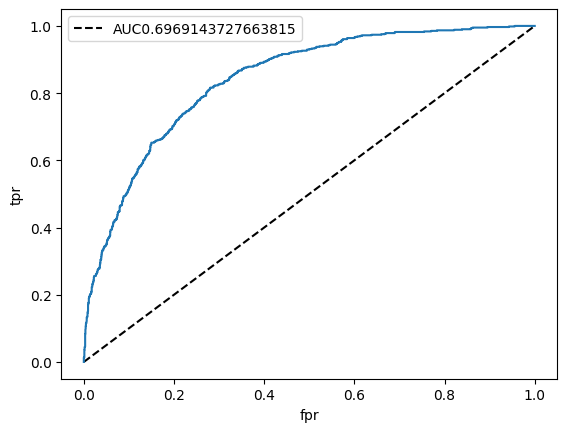

{'Accuracy': 0.7996553209823352,
 'Recall': 0.48032786885245904,
 'Precision': 0.6643990929705216,
 'F1 score': 0.5575642245480494,
 'AUC': 0.6969143727663815}

In [61]:
#Evaluation of model
classification_eva(y_test, pred_test2, prob_test_3)

# Conclusion:
* In this project I have used __Logistic Regression__ and __Random Forest__ for model development, based on the model evaluation, I will select Logistic Regression for making predictions as it has accuracy of about __80%__ and much better F1 score, recall value and precion value compared to Random Forest.